# HIV Testing Intervention

Tests and code for the creation of a new HIV testing intervention. 

In [1]:
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [2]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )

# HIV settings
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 50   # Is this working with init_states?
              }
hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest()
hiv = ss.HIV( pars=hiv_params, interventions=[hiv_simple_diagnostic] )

# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }

# Create and run simulation
sim = ss.Sim( pars         = sim_params,
              people       = ppl, 
              demographics = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases     = [ hiv, ss.Gonorrhea() ]
             )
sim.initialize()
sim.run()

AttributeError: module 'stisim.hiv' has no attribute 'SimpleDiagnosticTest'

In [ ]:
help(ss.hiv)

Help on module stisim.hiv in stisim:

NAME
    stisim.hiv - Defne HIV

CLASSES
    stisim.analyzers.Analyzer(stisim.modules.Module)
        CD4_analyzer
    stisim.interventions.Intervention(stisim.modules.Module)
        ART
    stisim.modules.Disease(stisim.modules.Module)
        HIV
    
    class ART(stisim.interventions.Intervention)
     |  ART(t: <built-in function array>, capacity: <built-in function array>)
     |  
     |  Method resolution order:
     |      ART
     |      stisim.interventions.Intervention
     |      stisim.modules.Module
     |      sciris.sc_utils.prettyobj
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, t: <built-in function array>, capacity: <built-in function array>)
     |      Simple initialization
     |  
     |  apply(self, sim)
     |  
     |  initialize(self, sim)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from stisim.modu

Text(0.5, 1.0, 'HIV: number of infections')

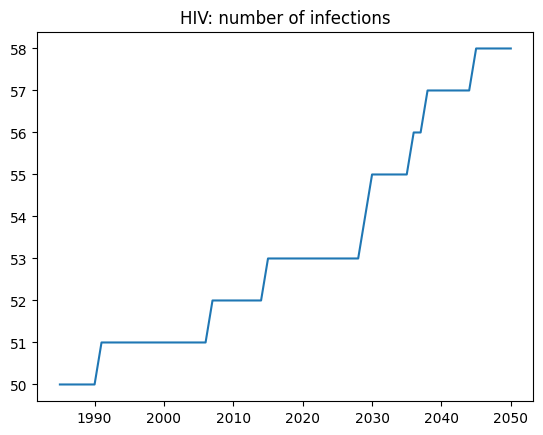

In [ ]:
plt.figure()
plt.plot( sim.yearvec, sim.results.hiv.n_infected )
plt.title( 'HIV: number of infections' )

## Testing intervention

In [ ]:
ppl

[<class 'stisim.people.People'>, <class 'stisim.people.BasePeople'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  _initialize_sta...  initialize()        update_networks()   
  _register_modul...  remove()            update_post()       
  add_module()        remove_dead()       update_results()    
  add_state()         request_death()     validate_age_da...  
  grow()              resolve_deaths()    init_results()      
  scale_flows()       
————————————————————————————————————————————————————————————
Properties:
  active              dead                male                
————————————————————————————————————————————————————————————
    _states: {140006252685056:          Quantity
             UID
             0      150.0907 [...]
   _uid_map: array([    0,     1,     2, ..., 26779, 26780, 26781])
        age:          Quantity
             UID
             0      150.090741
             1      159

In [ ]:
ppl['states']

#0. 'age':
         Quantity
UID
0      150.090741
1      159.055835
2      127.824154
3      128.693404
4      149.436625
...           ...
26777    0.250000
26778    0.250000
26779    0.250000
26780    0.250000
26781    0.250000

[26782 rows x 1 columns]
————————————————————————————————————————
#1. 'female':
       Quantity
UID
0         False
1          True
2          True
3         False
4         False
...         ...
26777      True
26778     False
26779     False
26780     False
26781     False

[26782 rows x 1 columns]
————————————————————————————————————————
#2. 'debut':
       Quantity
UID
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
26777       0.0
26778       0.0
26779       0.0
26780       0.0
26781       0.0

[26782 rows x 1 columns]
————————————————————————————————————————
#3. 'alive':
       Quantity
UID
0          True
1          True
2          True
3          True
4          True
...         ...
26777      True
2677